In [7]:
import numpy as np
import matplotlib.pyplot as plt
import mnist
%matplotlib inline

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))

def softmax(x):
    exps = np.exp(x - np.max(x))
    return exps / np.sum(exps)

def softmax_der(x):
    pass


In [82]:
class Layer:
    def __init__(self):
        pass
    
class Activation:
    def __init__(self):
        pass
    
class Dense(Layer):
    def __init__(self, input_size, num_of_neurons):
        self.w = np.random.rand(num_of_neurons, input_size) / np.sqrt(input_size)
        self.b = np.random.rand(num_of_neurons)
    
    def forward(self, x):
        return np.dot(x, self.w.T) + self.b
    
    def backward(self, x, delta, lr):
        nabla_w = np.dot(delta, x)
        nabla_b = delta
        
        self.w = self.w - lr * nabla_w
        # ???
        self.b = self.b - lr * np.mean(nabla_b, axis=1)

class Relu(Activation):
    def forward(self, x):
        return np.maximum(0, x)
    
    def backward(self, x):
        return (x > 0).astype(x.dtype)

class Sigmoid(Activation):
    def forward(self, x):
        return 1 / (1 + np.exp(-x))
    
    def backward(self, x):
        return self.forward(x) * (1 - self.forward(x))
    
class MSE:
    def forward(self, y, y_hat):
        return np.square(y - y_hat).mean(axis=1)
    
    def backward(self, y_hat, y):
        return -2 * np.sum(y - y_hat, axis=1)

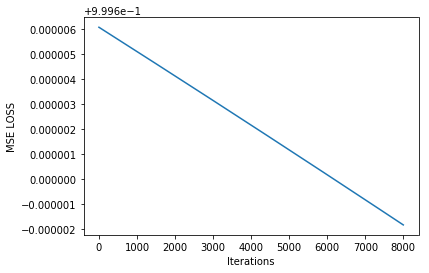

In [83]:
batch_size = 16
length = 10
num_of_neurons = 100
lr = 1e-6

x = np.random.rand(batch_size, length)
y = np.zeros((batch_size, 1))



activation = Relu()
net = [
        Dense(length, num_of_neurons),
        Relu(),
        Dense(num_of_neurons, length),
        Relu(),
        Dense(length, 1),
        Sigmoid()
      ]
loss_func = MSE()
layers = [layer for layer in net if isinstance(layer, Layer)]
        
losses = []
for i in range(8000):
    batch_y = y
    batch_x = x
    z_s = []
    a_s = [batch_x]

    for layer in net:
        if isinstance(layer, Layer):
            z = layer.forward(a_s[-1])
            z_s.append(z)

        if isinstance(layer, Activation):
            a = layer.forward(z_s[-1])
            a_s.append(a)

    loss = loss_func.forward(a_s[-1], batch_y)

    l1 = net[0]
    l2 = net[2]
    l3 = net[4]
    

    # update last layer
    grad_loss = loss_func.backward(a_s.pop(), batch_y)
    grad_activation = net[-1].backward(z_s.pop())
    delta = grad_loss * grad_activation.T
    l3.backward(a_s.pop(), delta, lr)


#     for layer in reversed(layers):
        
    grad_activation = net[-3].backward(z_s.pop())
    delta = np.dot(l3.w.T, delta) * grad_activation.T
    l2.backward(a_s.pop(), delta, lr)


    grad_activation = net[-5].backward(z_s.pop())
    delta = np.dot(l2.w.T, delta) * grad_activation.T
    l1.backward(a_s.pop(), delta, lr)

    losses.append(np.mean(loss))

plt.plot(losses)
plt.ylabel('MSE LOSS')
plt.xlabel('Iterations')
plt.show()
    